# Experimental Data Analysis

Using Amy's Neuron 2014 data for analysis


In [44]:
# to use cd, etc
import sys
import os

import numpy as np
from numpy import linalg, matlib
# save, import and load data
from numpy import asarray, save, load
# needed for some matrix manipulations

import math 

from scipy.io import loadmat  # this is the SciPy module that loads mat-files
from datetime import datetime, date, time
import pandas as pd

import mat73

import matplotlib.pyplot as plt
# for plots
import seaborn
# set up seaborn for the plots
seaborn.set()

In [2]:
# select data - fill in

# change directory to specified path
pathDir = '/Volumes/GoogleDrive/Shared drives/aoLab/Data/bmiLearning_jeev'

# example: Location: '.../Shared drives/aoLab/Data/bmiLearning_jeev/jeev080412/jeev080412a/tr_6/jeev080412a_tr_kin.mat
dataSubj = 'jeev'
dataStartDate = '050212'
dataEndData = '050412'

### Decoder Parameters

In [3]:
# decoderParams = 'decoderParams_'
# trKinData = '/jeev080412a/tr_6/jeev080412a_tr_kin.mat'

# # pathData = pathDir + "/" + dataSubj + dataStartDate 

# # ex: /Volumes/GoogleDrive/Shared drives/aoLab/Data/bmiLearning_jeev/jeev050212_050412
# pathExpData = pathData + dataSubj + dataStartDate + '_' + dataEndData
# pathDataFile = pathData + pathExpData

# os.chdir(pathData)
# os.getcwd()

## Just for quick work

In [4]:
decDir = 'decoderParams_jeev050212_050412.mat'
# nDir is trial-aligned to the go cue and uses all the trial data
nDir = 'catNeuralDat_jeev050212_050412_trE7_B100.mat'
# nDir = 'avgFRts_bestDir_bmi_jeev050212_050412_trE7_B100_TR-100_200_allTr.mat'
pathDir = '/Volumes/GoogleDrive/Shared drives/aoLab/Data/bmiLearning_jeev/jeev050212_050412'
os.chdir(pathDir)
os.getcwd()

'/Volumes/GoogleDrive/Shared drives/aoLab/Data/bmiLearning_jeev/jeev050212_050412'

In [5]:
# dec_data = '/Volumes/GoogleDrive/Shared drives/aoLab/Data/bmiLearning_jeev/jeev050212_050412/decoderParams_jeev050212_050412.mat'
dec_path = pathDir + '/' + decDir
n_path = pathDir + '/' + nDir

In [6]:
dec_dict = mat73.loadmat(dec_path,use_attrdict=True)
dec_dict.keys()

dict_keys(['H_MDp', 'H_MDv', 'H_PDp', 'H_PDv', 'Hs', 'K_MDp', 'K_MDv', 'K_PDp', 'K_PDv', 'Ks', 'Qs', 'bmiDay', 'bmiDecoderInd', 'bmiUnitInds', 'bmiUnitInds_all', 'bmiUnits', 'bmiUnits_all', 'sb', 'usedUnit_day', 'usedUnit_day_clean', 'usedUnit_decoder'])

In [7]:
dec_df = pd.DataFrame.from_dict(dec_dict, orient='index').transpose()
dec_df

/Users/mmadduri/.pyenv/versions/3.8.5/lib/python3.8/site-packages/pandas/core/internals/construction.py:305: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  values = np.array([convert(v) for v in values])


,H_MDp,H_MDv,H_PDp,H_PDv,Hs,K_MDp,K_MDv,K_PDp,K_PDv,Ks,...,bmiDay,bmiDecoderInd,bmiUnitInds,bmiUnitInds_all,bmiUnits,bmiUnits_all,sb,usedUnit_day,usedUnit_day_clean,usedUnit_decoder
0,"[[7.8579177962359, 1.8277026707046538, 7.67211...","[[0.7419855692112131, 0.3429436503935509, 3.49...","[[-1.3202397961889738, 1.9858131343089587, 1.2...","[[0.09599155790757895, -3.106857335946555, -2....","[[[1.9483168934334552, 4.628344535483583, 4.62...","[[0.006666953037920375, 0.008168629248716086, ...","[[0.003893029676447543, 0.003830093718059134, ...","[[-1.007531743652326, 2.5969388581326696, 0.91...","[[-0.7487052839958073, 2.615153993394279, 2.83...","[[[0.003559814889089684, 0.0019726465403377543...",...,"[1.0, 1.0, 1.0, 1.0, 2.0, 2.0, 3.0, 3.0, 3.0, ...","[1.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, ...","[16.0, 106.0, 196.0, 211.0, 216.0, 266.0, 301....","[16.0, 106.0, 196.0, 211.0, 216.0, 266.0, 301....","[sig004a, sig022a, sig040a, sig043a, sig044a, ...","[sig004a, sig022a, sig040a, sig043a, sig044a, ...","[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, ...","[[True, True, True, True, True, True, True, Tr...","[[True, True, True, True, True, True, True, Tr...","[[True, True, True, True, True, True, True, Tr..."


In [8]:
dec_df['H_MDp'][0]

array([[ 7.8579178 ,  1.82770267,  7.67211973,  0.26852021,  0.97892791,
         2.05582724,  0.5171872 ,  0.11814513,  2.80917049,  0.85877255,
         0.70973353,  0.98993813,  0.97208705,  4.80693122,  0.58667153,
         5.69909901],
       [10.63502369,  1.03348026,  8.42664476,  0.45516832,  1.18850953,
         6.97719184,  1.13404771,  1.28523512,  1.18502774,  2.35840804,
         1.79600854,  3.84481105,  0.8781774 ,  3.74290556,  4.69234509,
        19.87103131],
       [10.63502369,  1.03348026,  8.42664476,  0.45516832,  1.18850953,
         6.97719184,  1.13404771,  1.28523512,  1.18502774,  2.35840804,
         1.79600854,  3.84481105,  0.8781774 ,  3.74290556,  4.69234509,
        19.87103131],
       [        nan,         nan,         nan,         nan,         nan,
                nan,         nan,         nan,         nan,         nan,
                nan,         nan,         nan,         nan,         nan,
                nan]])

In [9]:
# how to access elements in the data frame
dec_day = 2
dec_df['H_MDp'][0][dec_day]

array([10.63502369,  1.03348026,  8.42664476,  0.45516832,  1.18850953,
        6.97719184,  1.13404771,  1.28523512,  1.18502774,  2.35840804,
        1.79600854,  3.84481105,  0.8781774 ,  3.74290556,  4.69234509,
       19.87103131])

   ### Neural Data

In [10]:
n_dict = mat73.loadmat(n_path,use_attrdict=True)
n_dict.keys()

dict_keys(['N_bmi', 'N_mc', 'N_norm_bmi', 'N_vfb', 'binvector', 'bmiDay', 'bmiDecoderInd', 'bmiDecoders', 'bmiSessions', 'bmiUnitInds', 'bmiUnitInds_all', 'bmiUnits', 'bmiUnits_all', 'day', 'days', 'mFRs', 'mcDay', 'mcSessions', 'params', 'sdFRs', 'sessID_bmi', 'sessID_mc', 'sessID_vfb', 'sessions', 'trEs_bmi', 'trEs_mc', 'trEs_vfb', 'trTs_bmi', 'trTs_mc', 'trTs_vfb', 'vfbDay', 'vfbSessions'])

In [11]:
type(n_dict)

mat73.AttrDict

In [12]:
def findBmiUnitsOnly(neuronData_dict):
    # divide by .1 to get firing rates not spike counts (spike counts binned in 100 ms)
    n_bmi = neuronData_dict['N_bmi']/.1; 
    # n_bmi = num time bins x num neurons total x trials (total)

    # off by one, python to matlab
   

    # find the units that I care about (bmiUnitsInds_all)
    n_units = neuronData_dict['bmiUnitInds_all'] - 1
    n_units = n_units.astype('int')
#     print(n_units)
    print("Units that we care about:", n_units)

    # should be the same as the number of units in bmiUnitsInds_all
    n_bmiUnits = n_bmi[:, n_units, : ];

    n_shape = n_bmiUnits.shape
    print("shape of n_bmiUnits:", n_shape)
    if n_shape[1] != neuronData_dict['bmiUnitInds_all'].size:
        print("error in converting n_bmiUnits")
        return 0
    else:
        return n_bmiUnits


In [13]:
n_bmiUnits = findBmiUnitsOnly(n_dict)

Units that we care about: [ 15 105 195 210 215 265 300 320 360 440 480 550 590 595 615 635]
shape of n_bmiUnits: (30, 16, 1626)


In [14]:
len(n_dict['binvector'])

30

In [15]:
def timebinNeuralTrialData(neuralData_timeUnitsTrials):
    alignInd = np.where(n_dict['binvector'] == 0)[0][0]

    # getting the times that we care about
    # 5 = 5 times bins before align time (so 500 ms)
    # 2 = 2 time bins before align time (so 100 ms)
    startOff = 5
    endOff = 2
    startInd = alignInd - startOff
    if startInd < 0:
        print("Error: Starting Index in timebinNeuralTrialData < 0")
    endInd = alignInd + endOff
    if endInd > len(n_dict['binvector']):
        print("Error: End Index in timebinNeuralTrialData too big")
    neuralData_time = neuralData_timeUnitsTrials[startInd:endInd, :, :]
    print("Before Time Avg, binning size", neuralData_time.shape)
    if neuralData_time.shape[0] != (startOff + endOff):
        print("Error: Shape error in timebinNeuralTrialData")
    neuralData_timeAvg = np.mean(neuralData_time, axis=0)
    return neuralData_timeAvg



In [16]:
n_bmiUnitsTimeAvg = timebinNeuralTrialData(n_bmiUnits)
print(n_bmiUnitsTimeAvg.shape)
# these are all the trials -- need to look at trEs to determine successful trials

Before Time Avg, binning size (7, 16, 1626)
(16, 1626)


In [17]:
n_bmiUnitsTimeAvg.ndim

2

In [18]:
n_dict.keys()

dict_keys(['N_bmi', 'N_mc', 'N_norm_bmi', 'N_vfb', 'binvector', 'bmiDay', 'bmiDecoderInd', 'bmiDecoders', 'bmiSessions', 'bmiUnitInds', 'bmiUnitInds_all', 'bmiUnits', 'bmiUnits_all', 'day', 'days', 'mFRs', 'mcDay', 'mcSessions', 'params', 'sdFRs', 'sessID_bmi', 'sessID_mc', 'sessID_vfb', 'sessions', 'trEs_bmi', 'trEs_mc', 'trEs_vfb', 'trTs_bmi', 'trTs_mc', 'trTs_vfb', 'vfbDay', 'vfbSessions'])

### Separate by Target

In [19]:
# get the targVector
targVect = n_dict['trEs_bmi'][:,0] - 63
print("Len of targVect", len(targVect))
if (np.any(targVect > 8) or np.any(targVect < 1)):
    print("non-targets:", np.where(targVect > 8)[0])
    print("non-targets:", np.where(targVect < 1)[0])
    print("Number of non-targets:", len(np.where(targVect > 8)[0]) + len(np.where(targVect < 1)[0]))
    print("Num of Trials to Expect:", len(targVect)- (len(np.where(targVect > 8)[0]) + len(np.where(targVect < 1)[0])))
    
targNum = np.zeros(8) 
for iT in range(1, 9, 1):
    print(iT)
    targNum[iT-1] = len(np.where(targVect == iT)[0])
    print("Target", iT, ": ", targNum[iT-1])
sum(targNum)

Len of targVect 1626
non-targets: [  16  208 1102 1211 1327 1336]
non-targets: [  34 1292]
Number of non-targets: 8
Num of Trials to Expect: 1618
1
Target 1 :  197.0
2
Target 2 :  199.0
3
Target 3 :  197.0
4
Target 4 :  194.0
5
Target 5 :  204.0
6
Target 6 :  201.0
7
Target 7 :  229.0
8
Target 8 :  197.0


1618.0

In [20]:
print(n_bmiUnitsTimeAvg.shape)
test = n_bmiUnitsTimeAvg[:, np.where(targVect == 1)]
test.shape
n_bmiUnitsTimeAvg.ndim

(16, 1626)


2

In [84]:
def TargPositionVector(neuralData_timeUnitsTrials, targetsVector):
    print("Starting nData dims", neuralData_timeUnitsTrials.ndim)
#     if neuralData_timeUnitsTrials.ndim != 3:
#         # assume it's been time-binned
#         neuralData_timeUnitsTrials = np.expand_dims(neuralData_timeUnitsTrials, axis = 0)
#     print("nData shape", neuralData_timeUnitsTrials.shape)
    numTrials = neuralData_timeUnitsTrials.shape[-1]
    targPositionVector = np.zeros((3, numTrials))
    
    for iT in range(8):
        print("target:", iT + 1)
        print("x:",  np.cos(np.pi/4 * iT))
        print("y:",  np.sin(np.pi/4 * iT))
        
        targPositionVector[0, np.where(targetsVector == (iT + 1))[0]] = iT + 1
        targPositionVector[1, np.where(targetsVector == (iT + 1))[0]] = np.cos(np.pi/4 * iT)
        targPositionVector[2, np.where(targetsVector == (iT + 1))[0]] = np.sin(np.pi/4 * iT)
   
    return targPositionVector

In [85]:
trialTargVector = TargPositionVector(n_bmiUnitsTimeAvg, targVect)

Starting nData dims 2
target: 1
x: 1.0
y: 0.0
target: 2
x: 0.7071067811865476
y: 0.7071067811865475
target: 3
x: 6.123233995736766e-17
y: 1.0
target: 4
x: -0.7071067811865475
y: 0.7071067811865476
target: 5
x: -1.0
y: 1.2246467991473532e-16
target: 6
x: -0.7071067811865477
y: -0.7071067811865475
target: 7
x: -1.8369701987210297e-16
y: -1.0
target: 8
x: 0.7071067811865475
y: -0.7071067811865477


In [86]:
trialTargVector.shape
check = 500
print(trialTargVector[:, check])
print(targVect[check])

[2.         0.70710678 0.70710678]
2.0


In [21]:
# assume input = time x units x trials (total)
def sortTargetNeuralData(neuralData_timeUnitsTrials, targetsVector):
    print("Starting nData dims", neuralData_timeUnitsTrials.ndim)
    if neuralData_timeUnitsTrials.ndim != 3:
        # assume it's been time-binned
#         print("here")
        neuralData_timeUnitsTrials = np.expand_dims(neuralData_timeUnitsTrials, axis = 0)
    print("nData shape", neuralData_timeUnitsTrials.shape)    
    
    # TODO: maybe more efficient way to do this?
    targ1 = neuralData_timeUnitsTrials[:, :, np.where(targetsVector == 1)[0]]    
    targ2 = neuralData_timeUnitsTrials[:, :, np.where(targetsVector == 2)[0]]
    targ3 = neuralData_timeUnitsTrials[:, :, np.where(targetsVector == 3)[0]]
    targ4 = neuralData_timeUnitsTrials[:, :, np.where(targetsVector == 4)[0]]
    targ5 = neuralData_timeUnitsTrials[:, :, np.where(targetsVector == 5)[0]]
    targ6 = neuralData_timeUnitsTrials[:, :, np.where(targetsVector == 6)[0]]    
    targ7 = neuralData_timeUnitsTrials[:, :, np.where(targetsVector == 7)[0]]
    targ8 = neuralData_timeUnitsTrials[:, :, np.where(targetsVector == 8)[0]]
    
    return (targ1, targ2, targ3, targ4, targ5, targ6, targ7, targ8)

In [22]:
(n_bmiUnitsT1, n_bmiUnitsT2, n_bmiUnitsT3, n_bmiUnitsT4, n_bmiUnitsT5, n_bmiUnitsT6, n_bmiUnitsT7, n_bmiUnitsT8) = sortTargetNeuralData(n_bmiUnitsTimeAvg, targVect)

# check to see these match
if (n_bmiUnitsT1.shape[-1] != targNum[0]):
    print("error in targ 1")
if (n_bmiUnitsT2.shape[-1] != targNum[1]):
    print("error in targ 2")
if (n_bmiUnitsT3.shape[-1] != targNum[2]):
    print("error in targ 3")
if (n_bmiUnitsT4.shape[-1] != targNum[3]):
    print("error in targ 4")
if (n_bmiUnitsT5.shape[-1] != targNum[4]):
    print("error in targ 5")
if (n_bmiUnitsT6.shape[-1] != targNum[5]):
    print("error in targ 6")
if (n_bmiUnitsT7.shape[-1] != targNum[6]):
    print("error in targ 7")
if (n_bmiUnitsT8.shape[-1] != targNum[7]):
    print("error in targ 8")
    
# print(n_bmiUnitsT1.shape)
# print(n_bmiUnitsT2.shape)
# print(n_bmiUnitsT3.shape)
# print(n_bmiUnitsT4.shape)
# print(n_bmiUnitsT5.shape)
# print(n_bmiUnitsT6.shape)
# print(n_bmiUnitsT7.shape)
# print(n_bmiUnitsT8.shape)

# for iT in range(1, 9, 1):
#     targNum[iT-1] = len(np.where(targVect == iT)[0])
#     print("Target", iT, ": ", targNum[iT-1])
# sum(targNum)


Starting nData dims 2
nData shape (1, 16, 1626)


(1, 16, 197)

### Separate By Decoder

In [24]:
def getTrialsByDecoder(n_dict):
    # separate into decoders
    sessID_bmi = n_dict['sessID_bmi'] 
    bmiDecInd = n_dict['bmiDecoderInd']
    numTrials = n_bmiUnitsTimeAvg.shape[-1]
    print(sessID_bmi)
    print(sessID_bmi.shape)
    print(bmiDecInd)
    print(bmiDecInd.shape)
    numberSession = int(max(sessID_bmi))
    print("Number of Sessions:", numberSession)
    numberDecoders = int(max(bmiDecInd))
    print("Number of Decoders:", numberDecoders)
    bmiDecTrial = np.zeros(numTrials)
    # take value of sessID_bmi --> val_sessID
    # replace with the value of bmiDecInd at index of (val_sessID)

    sessID_bmiOff = sessID_bmi - 1
    bmiDecTrial = bmiDecInd[sessID_bmiOff.astype(int)]

    # print number of trials in each session
    trialsBySession = np.zeros(numberSession)
    trialsByDecoder = np.zeros(numberDecoders)
    for iT in range(numberSession):
        print("Session ID:", iT + 1) # off by one for matlab
        print("Decoder Used: ", int(bmiDecInd[iT]))
    #     print(np.where(sessID_bmiOff == iT)) # also off by one in matlab
        print("Total Number of Trials in Sessions: ", sum(sessID_bmiOff == iT))
        trialsBySession[iT] = sum(sessID_bmiOff == iT)
    #     print(int(bmiDecInd[iT]))
        trialsByDecoder[int(bmiDecInd[iT]) - 1] = trialsByDecoder[int(bmiDecInd[iT]) - 1] + sum(sessID_bmiOff == iT)

    print(trialsByDecoder)

    # bmiDecTrial is a trial num x 1 vector that assigs each trial to a decoder
    plt.plot(bmiDecTrial, '.')
    plt.title("Trials by Decoder Visualization")
    plt.xlabel("Trial Number")
    
    return (bmiDecTrial, trialsByDecoder, trialsBySession)


[ 1.  1.  1. ... 10. 10. 10.]
(1626,)
[1. 2. 2. 2. 2. 2. 2. 2. 2. 3.]
(10,)
Number of Sessions: 10
Number of Decoders: 3
Session ID: 1
Decoder Used:  1
Total Number of Trials in Sessions:  37
Session ID: 2
Decoder Used:  2
Total Number of Trials in Sessions:  171
Session ID: 3
Decoder Used:  2
Total Number of Trials in Sessions:  147
Session ID: 4
Decoder Used:  2
Total Number of Trials in Sessions:  145
Session ID: 5
Decoder Used:  2
Total Number of Trials in Sessions:  240
Session ID: 6
Decoder Used:  2
Total Number of Trials in Sessions:  362
Session ID: 7
Decoder Used:  2
Total Number of Trials in Sessions:  109
Session ID: 8
Decoder Used:  2
Total Number of Trials in Sessions:  77
Session ID: 9
Decoder Used:  2
Total Number of Trials in Sessions:  48
Session ID: 10
Decoder Used:  3
Total Number of Trials in Sessions:  290
[  37. 1299.  290.]


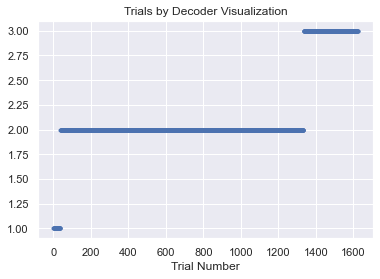

In [25]:
n_bmiUnitsDec, bmiTrialsPerDecoder, bmiTrialsPerSession = getTrialsByDecoder(n_dict)

In [27]:
# takes in the neural data that's time x neurons x trials and separates outs by decoder
# def SeparateNeuralDataBeDecoder(neuralData, decTrialVector):
    

In [28]:
# this is time-binned neurons x all trials
n_bmiUnitsTimeAvg

array([[214.28571429, 142.85714286,  71.42857143, ...,  71.42857143,
         42.85714286, 171.42857143],
       [ 42.85714286,  71.42857143,  14.28571429, ...,  57.14285714,
         42.85714286,  14.28571429],
       [200.        , 200.        ,  71.42857143, ...,  42.85714286,
        214.28571429, 228.57142857],
       ...,
       [257.14285714, 371.42857143, 300.        , ..., 157.14285714,
        414.28571429, 371.42857143],
       [ 14.28571429,  71.42857143,   0.        , ..., 100.        ,
         42.85714286,  71.42857143],
       [214.28571429, 214.28571429, 242.85714286, ..., 314.28571429,
        271.42857143,  85.71428571]])

In [34]:
print(n_bmiUnitsTimeAvg.shape)
print(targVect.shape)
print(bmiTrialsPerSession.shape)

(16, 1626)
(1626,)
(10,)


for now, let's just focus on reaches to target 1

In [87]:
n_bmiUnitsDec.shape

(1626,)

In [ ]:
n_bmiUnitsT1_